<a href="https://colab.research.google.com/github/THUVAARAGAN/fyp/blob/main/pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.9 MB/s eta 0:00:00


In [2]:
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel

In [3]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [5]:
def show_n_generate(url, greedy = True, model = model_raw):
    # image = Image.open(requests.get(url, stream =True).raw)
    image = Image.open(url)
    pixel_values   = image_processor(image, return_tensors ="pt").pixel_values
    print(pixel_values)
    print(pixel_values.shape)
    plt.imshow(np.asarray(image))
    plt.show()

    if greedy:
        generated_ids  = model.generate(pixel_values, max_new_tokens = 30)
        print("generated_ids (True)=", generated_ids)
    else:
        generated_ids  = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens = 30,
            top_k=5)
        print("generated_ids (else) =", generated_ids)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)

tensor([[[[-0.2941, -0.1373,  0.0431,  ...,  0.2157,  0.2157,  0.2157],
          [-0.3176, -0.1686,  0.0118,  ...,  0.2235,  0.2157,  0.2157],
          [-0.3647, -0.2157, -0.0353,  ...,  0.2157,  0.2235,  0.2235],
          ...,
          [-0.4118, -0.3647, -0.3412,  ..., -0.3725, -0.3490, -0.3490],
          [-0.4118, -0.3882, -0.3804,  ..., -0.4118, -0.3882, -0.3882],
          [-0.4118, -0.4196, -0.4118,  ..., -0.5059, -0.4745, -0.4745]],

         [[-0.3020, -0.1451,  0.0353,  ...,  0.2000,  0.2078,  0.2078],
          [-0.3255, -0.1765,  0.0039,  ...,  0.2078,  0.2157,  0.2157],
          [-0.3725, -0.2235, -0.0431,  ...,  0.2000,  0.2235,  0.2235],
          ...,
          [-0.3490, -0.3098, -0.2863,  ..., -0.3882, -0.3490, -0.3490],
          [-0.3490, -0.3333, -0.3255,  ..., -0.4275, -0.3882, -0.3882],
          [-0.3490, -0.3647, -0.3569,  ..., -0.5137, -0.4745, -0.4745]],

         [[-0.2549, -0.0980,  0.0824,  ...,  0.3412,  0.3176,  0.3176],
          [-0.2784, -0.1294,  

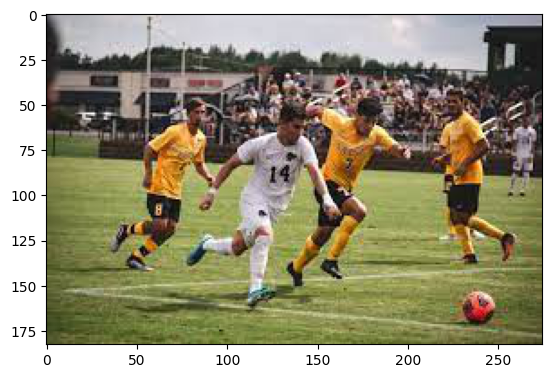

generated_ids (else) = tensor([[50256, 35634,  2189,  1938,   319,   257,  2214,  1141,   257,   983,
           220, 50256]])
soccer players on a field during a game 


In [6]:
url1 = '/content/football.jpg'
show_n_generate(url1, greedy = False)